In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap
from scipy import stats
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/luminarian/Thinkful-Capstone-3/97f2df7261a9d688911a4b724a289f22a9ee3138/data.csv', encoding= 'unicode_escape')
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [3]:
countryCodes = pd.get_dummies(df['Country'])
df = pd.concat([df, countryCodes], axis=1)
df = df.drop('Country', axis=1)

In [4]:
subsample = df.sample(n=30000)

In [5]:
transactions = subsample.groupby(['InvoiceNo']).mean()
transactions['Payment'] = transactions['Quantity'] * transactions['UnitPrice']
transactions

Quantity  UnitPrice  CustomerID  Australia  Austria  Bahrain  \
InvoiceNo                                                                 
536370         21.0       2.45     12583.0          0        0        0   
536374         32.0      10.95     15100.0          0        0        0   
536375          6.0       1.06     17850.0          0        0        0   
536381          2.0       2.10     15311.0          0        0        0   
536382          2.0      14.95     16098.0          0        0        0   
...             ...        ...         ...        ...      ...      ...   
C581106        -1.0       3.75     13668.0          0        0        0   
C581117        -2.0       2.55     16393.0          0        0        0   
C581229       -10.0       2.08     12558.0          0        0        0   
C581235        -1.0       4.95     15950.0          0        0        0   
C581409        -2.0       2.95     12476.0          0        0        0   

           Belgium  Brazil  Canada  Channel Islands  ...  Saudi Arabia  \
InvoiceNo                                            ...                 
536370           0       0       0                0  ...             0   
536374           0       0       0                0  ...             0   
536375           0       0       0                0  ...             0   
536381           0       0       0                0  ...             0   
536382           0       0       0                0  ...             0   
...            ...     ...     ...              ...  ...           ...   
C581106          0       0       0                0  ...             0   
C581117          0       0       0                0  ...             0   
C581229          0       0       0                0  ...             0   
C581235          0       0       0                0  ...             0   
C581409          0       0       0                0  ...             0   

           Singapore  Spain  Sweden  Switzerland  USA  United Arab Emirates  \
InvoiceNo                                                                     
536370             0      0       0            0    0                     0   
536374             0      0       0            0    0                     0   
536375             0      0       0            0    0                     0   
536381             0      0       0            0    0                     0   
536382             0      0       0            0    0                     0   
...              ...    ...     ...          ...  ...                   ...   
C581106            0      0       0            0    0                     0   
C581117            0      0       0            0    0                     0   
C581229            0      0       0            0    1                     0   
C581235            0      0       0            0    0                     0   
C581409            0      0       0            0    0                     0   

           United Kingdom  Unspecified  Payment  
InvoiceNo                                        
536370                  0            0    51.45  
536374                  1            0   350.40  
536375                  1            0     6.36  
536381                  1            0     4.20  
536382                  1            0    29.90  
...                   ...          ...      ...  
C581106                 1            0    -3.75  
C581117                 1            0    -5.10  
C581229                 0            0   -20.80  
C581235                 1            0    -4.95  
C581409                 0            0    -5.90  

[11717 rows x 42 columns]

In [6]:
clean_transactions = transactions.copy()
clean_transactions['Quantity'] = clean_transactions['Quantity'][clean_transactions['Quantity'].between(clean_transactions['Quantity'].quantile(.05), clean_transactions['Quantity'].quantile(.95))]
clean_transactions['UnitPrice'] = clean_transactions['UnitPrice'][clean_transactions['UnitPrice'].between(clean_transactions['UnitPrice'].quantile(.05), clean_transactions['UnitPrice'].quantile(.95))]
clean_transactions['Payment'] = clean_transactions['Payment'][clean_transactions['Payment'].between(clean_transactions['Payment'].quantile(.05), clean_transactions['Payment'].quantile(.95))]
clean_transactions = clean_transactions.dropna(axis=0)
clean_transactions


Quantity  UnitPrice  CustomerID  Australia  Austria  Bahrain  \
InvoiceNo                                                                  
536370     21.000000   2.450000     12583.0          0        0        0   
536375      6.000000   1.060000     17850.0          0        0        0   
536381      2.000000   2.100000     15311.0          0        0        0   
536384      8.666667   5.183333     18074.0          0        0        0   
536388      8.000000   4.200000     16250.0          0        0        0   
...              ...        ...         ...        ...      ...      ...   
581538      1.000000   3.180000     14446.0          0        0        0   
581567      3.000000   5.950000     16626.0          0        0        0   
581570      8.000000   1.650000     12662.0          0        0        0   
581571      1.000000   8.050000     15311.0          0        0        0   
581587      4.000000   3.950000     12680.0          0        0        0   

           Belgium  Brazil  Canada  Channel Islands  ...  Saudi Arabia  \
InvoiceNo                                            ...                 
536370           0       0       0                0  ...             0   
536375           0       0       0                0  ...             0   
536381           0       0       0                0  ...             0   
536384           0       0       0                0  ...             0   
536388           0       0       0                0  ...             0   
...            ...     ...     ...              ...  ...           ...   
581538           0       0       0                0  ...             0   
581567           0       0       0                0  ...             0   
581570           0       0       0                0  ...             0   
581571           0       0       0                0  ...             0   
581587           0       0       0                0  ...             0   

           Singapore  Spain  Sweden  Switzerland  USA  United Arab Emirates  \
InvoiceNo                                                                     
536370             0      0       0            0    0                     0   
536375             0      0       0            0    0                     0   
536381             0      0       0            0    0                     0   
536384             0      0       0            0    0                     0   
536388             0      0       0            0    0                     0   
...              ...    ...     ...          ...  ...                   ...   
581538             0      0       0            0    0                     0   
581567             0      0       0            0    0                     0   
581570             0      0       0            0    0                     0   
581571             0      0       0            0    0                     0   
581587             0      0       0            0    0                     0   

           United Kingdom  Unspecified    Payment  
InvoiceNo                                          
536370                  0            0  51.450000  
536375                  1            0   6.360000  
536381                  1            0   4.200000  
536384                  1            0  44.922222  
536388                  1            0  33.600000  
...                   ...          ...        ...  
581538                  1            0   3.180000  
581567                  1            0  17.850000  
581570                  0            0  13.200000  
581571                  1            0   8.050000  
581587                  0            0  15.800000  

[9053 rows x 42 columns]

Dropping any rows with null values and clear outliers (5th quantile on low and high side)

In [18]:
scaler = StandardScaler()
scaled_transactions = scaler.fit_transform(clean_transactions)

Scaling data for PCA analysis

In [22]:
pca = PCA(n_components=2)
stock_pca = pca.fit_transform(scaled_transactions)

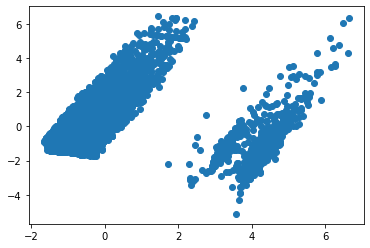

In [23]:
plt.scatter(x=stock_pca[:, 0], y=stock_pca[:, 1])
plt.show()

Looks to be two clusters on the PCA analysis

[t-SNE] Computing 451 nearest neighbors...
[t-SNE] Indexed 9053 samples in 0.164s...
[t-SNE] Computed neighbors for 9053 samples in 1.501s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9053
[t-SNE] Computed conditional probabilities for sample 2000 / 9053
[t-SNE] Computed conditional probabilities for sample 3000 / 9053
[t-SNE] Computed conditional probabilities for sample 4000 / 9053
[t-SNE] Computed conditional probabilities for sample 5000 / 9053
[t-SNE] Computed conditional probabilities for sample 6000 / 9053
[t-SNE] Computed conditional probabilities for sample 7000 / 9053
[t-SNE] Computed conditional probabilities for sample 8000 / 9053
[t-SNE] Computed conditional probabilities for sample 9000 / 9053
[t-SNE] Computed conditional probabilities for sample 9053 / 9053
[t-SNE] Mean sigma: 23.028777
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.065823
[t-SNE] KL divergence after 300 iterations: 0.874807


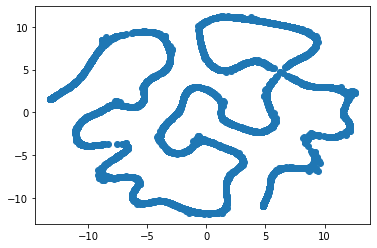

In [10]:
tsne = TSNE(n_components=2, verbose=1, perplexity=150, n_iter=300)
stock_tsne = tsne.fit_transform(clean_transactions)
plt.scatter(x=stock_tsne[:, 0], y=stock_tsne[:, 1])
plt.show()

Looks to be one mostly long connected line between transaction types using the unscaled data, so attempting to find clustering on the tsne analysis may be difficult

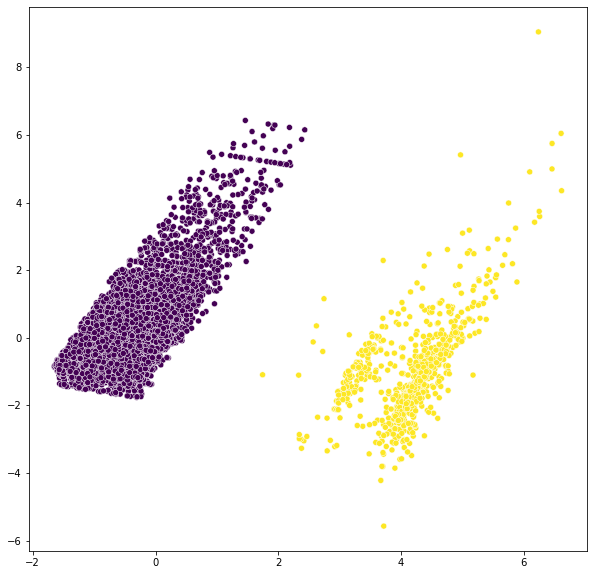

In [12]:
from sklearn.mixture import GaussianMixture

tsne_gmm_cluster = GaussianMixture(n_components=2)
clusters = tsne_gmm_cluster.fit_predict(stock_pca)

plt.figure(figsize=(10, 10))

sns.scatterplot(x=stock_pca[:, 0], y=stock_pca[:, 1], c=clusters)

plt.show()

Now performing analysis on a separate sample

In [14]:
subsample2 = df.sample(n=30000)


In [15]:
transactions2 = subsample2.groupby(['InvoiceNo']).mean()
transactions2['Payment'] = transactions['Quantity'] * transactions['UnitPrice']
transactions2

Quantity  UnitPrice  CustomerID  Australia  Austria  Bahrain  \
InvoiceNo                                                                 
536365          6.0       3.39     17850.0          0        0        0   
536369          3.0       5.95     13047.0          0        0        0   
536370         18.0       2.70     12583.0          0        0        0   
536373          6.0       4.95     17850.0          0        0        0   
536375          6.0       3.39     17850.0          0        0        0   
...             ...        ...         ...        ...      ...      ...   
C581117        -1.0       1.25     16393.0          0        0        0   
C581124        -4.0       2.95     13109.0          0        0        0   
C581393        -3.0       4.25     16892.0          0        0        0   
C581466        -1.0       4.95     13883.0          0        0        0   
C581490       -12.0       1.95     14397.0          0        0        0   

           Belgium  Brazil  Canada  Channel Islands  ...  Saudi Arabia  \
InvoiceNo                                            ...                 
536365           0       0       0                0  ...             0   
536369           0       0       0                0  ...             0   
536370           0       0       0                0  ...             0   
536373           0       0       0                0  ...             0   
536375           0       0       0                0  ...             0   
...            ...     ...     ...              ...  ...           ...   
C581117          0       0       0                0  ...             0   
C581124          0       0       0                0  ...             0   
C581393          0       0       0                0  ...             0   
C581466          0       0       0                0  ...             0   
C581490          0       0       0                0  ...             0   

           Singapore  Spain  Sweden  Switzerland  USA  United Arab Emirates  \
InvoiceNo                                                                     
536365             0      0       0            0    0                     0   
536369             0      0       0            0    0                     0   
536370             0      0       0            0    0                     0   
536373             0      0       0            0    0                     0   
536375             0      0       0            0    0                     0   
...              ...    ...     ...          ...  ...                   ...   
C581117            0      0       0            0    0                     0   
C581124            0      0       0            0    0                     0   
C581393            0      0       0            0    0                     0   
C581466            0      0       0            0    0                     0   
C581490            0      0       0            0    0                     0   

           United Kingdom  Unspecified  Payment  
InvoiceNo                                        
536365                  1            0      NaN  
536369                  1            0      NaN  
536370                  0            0    51.45  
536373                  1            0      NaN  
536375                  1            0     6.36  
...                   ...          ...      ...  
C581117                 1            0    -5.10  
C581124                 1            0      NaN  
C581393                 1            0      NaN  
C581466                 1            0      NaN  
C581490                 1            0      NaN  

[11662 rows x 42 columns]

In [16]:
clean_transactions2 = transactions2.copy()
clean_transactions2['Quantity'] = clean_transactions2['Quantity'][clean_transactions2['Quantity'].between(clean_transactions2['Quantity'].quantile(.05), clean_transactions2['Quantity'].quantile(.95))]
clean_transactions2['UnitPrice'] = clean_transactions2['UnitPrice'][clean_transactions2['UnitPrice'].between(clean_transactions2['UnitPrice'].quantile(.05), clean_transactions2['UnitPrice'].quantile(.95))]
clean_transactions2['Payment'] = clean_transactions2['Payment'][clean_transactions2['Payment'].between(clean_transactions2['Payment'].quantile(.05), clean_transactions2['Payment'].quantile(.95))]
clean_transactions2 = clean_transactions2.dropna(axis=0)
clean_transactions2

Quantity  UnitPrice  CustomerID  Australia  Austria  Bahrain  \
InvoiceNo                                                                  
536370     18.000000   2.700000     12583.0          0        0        0   
536375      6.000000   3.390000     17850.0          0        0        0   
536381      1.333333   2.166667     15311.0          0        0        0   
536382     12.000000   0.850000     16098.0          0        0        0   
536384      3.000000   6.450000     18074.0          0        0        0   
...              ...        ...         ...        ...      ...      ...   
581516     15.000000   3.170000     14422.0          0        0        0   
581538      1.000000   1.130000     14446.0          0        0        0   
581567     24.000000   0.790000     16626.0          0        0        0   
581570      6.000000   2.950000     12662.0          0        0        0   
581571     24.000000   3.390000     15311.0          0        0        0   

           Belgium  Brazil  Canada  Channel Islands  ...  Saudi Arabia  \
InvoiceNo                                            ...                 
536370           0       0       0                0  ...             0   
536375           0       0       0                0  ...             0   
536381           0       0       0                0  ...             0   
536382           0       0       0                0  ...             0   
536384           0       0       0                0  ...             0   
...            ...     ...     ...              ...  ...           ...   
581516           0       0       0                0  ...             0   
581538           0       0       0                0  ...             0   
581567           0       0       0                0  ...             0   
581570           0       0       0                0  ...             0   
581571           0       0       0                0  ...             0   

           Singapore  Spain  Sweden  Switzerland  USA  United Arab Emirates  \
InvoiceNo                                                                     
536370             0      0       0            0    0                     0   
536375             0      0       0            0    0                     0   
536381             0      0       0            0    0                     0   
536382             0      0       0            0    0                     0   
536384             0      0       0            0    0                     0   
...              ...    ...     ...          ...  ...                   ...   
581516             0      0       0            0    0                     0   
581538             0      0       0            0    0                     0   
581567             0      0       0            0    0                     0   
581570             0      0       0            0    0                     0   
581571             0      0       0            0    0                     0   

           United Kingdom  Unspecified    Payment  
InvoiceNo                                          
536370                  0            0  51.450000  
536375                  1            0   6.360000  
536381                  1            0   4.200000  
536382                  1            0  29.900000  
536384                  1            0  44.922222  
...                   ...          ...        ...  
581516                  1            0  49.500000  
581538                  1            0   3.180000  
581567                  1            0  17.850000  
581570                  0            0  13.200000  
581571                  1            0   8.050000  

[6073 rows x 42 columns]

In [20]:
scaled_transactions2 = scaler.transform(clean_transactions)

In [25]:
stock_pca2 = pca.transform(scaled_transactions2)

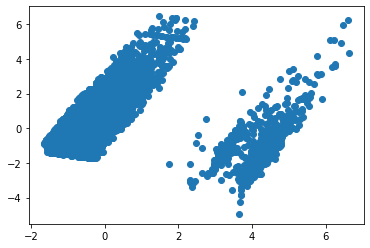

In [26]:
plt.scatter(x=stock_pca2[:, 0], y=stock_pca2[:, 1])
plt.show()

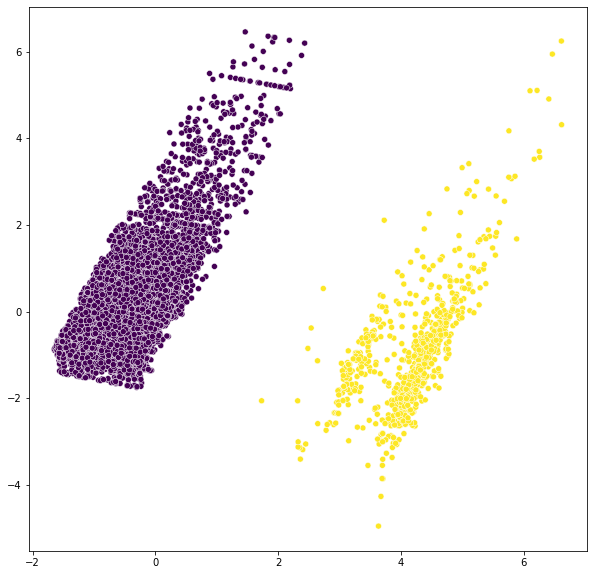

In [27]:
from sklearn.mixture import GaussianMixture

tsne_gmm_cluster = GaussianMixture(n_components=2)
clusters2 = tsne_gmm_cluster.fit_predict(stock_pca2)

plt.figure(figsize=(10, 10))

sns.scatterplot(x=stock_pca2[:, 0], y=stock_pca2[:, 1], c=clusters2)

plt.show()